## Getting started with SimFrame

This notebook will show how to set up SimFrame, load in a `MasterLattice` object and settings for tracking, and show how to plot the results.

It is assumed that the [MasterLattice](https://gitlab.stfc.ac.uk/jkj62/masterlattice/) and [SimCodes](https://gitlab.stfc.ac.uk/jkj62/simcodes/) repositories have been cloned, and that they are accessible at the same directory level as SimFrame. Alternatively, these can be installed via `setup.py` in their respective directories, in which case they do not have to be provided on instantiation.

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, "../../")
import SimulationFramework.Framework as fw  # noqa E402
from SimulationFramework.Framework import load_directory  # noqa E402
import SimulationFramework.Modules.Beams as rbf  # noqa E402
import SimulationFramework.Modules.Twiss as rtf  # noqa E402

# Define a new framework instance, in directory 'getting_started'.
#       "clean" will empty (delete everything!) in the directory if true
#       "verbose" will print a progressbar if true
framework = fw.Framework(
        master_lattice='../../../masterlattice/MasterLattice/',
        simcodes='../../../simcodes/SimCodes',
        directory="./getting_started",
        clean=False,
        verbose=False
    )

scaling = 4

### Preparing the simulation and tracking

Load a lattice definition file. These can be found in `Masterlattice/Lattices` by default.

In [ ]:
framework.loadSettings("Lattices/clara400_v13_SP3.def")
startline = "generator"
endline = "S06"

Change all lattice codes to ASTRA/Elegant/GPT/Ocelot with exclusions (injector can only be done in ASTRA/GPT).

In [5]:
framework.change_Lattice_Code("All", "elegant", exclude=["injector400"])

# Individual lattice lines defined in the settings file can also be changed,
# i.e. framework.change_Lattice_Code("VBC", "elegant")

This is the code that generates the laser distribution (ASTRA or GPT)

In [6]:
framework.change_generator("ASTRA")

Load a starting laser distribution setting

In [7]:
framework.generator.load_defaults("clara_400_2ps_Gaussian")

Set the thermal emittance for the generator

In [8]:
framework.generator.thermal_emittance = 0.0005

This is a scaling parameter. it defines the number of particles to create at the gun (this is "ASTRA generator" which creates distributions).
The space charge 3D mesh in ASTRA/GPT performs best if the number of particles is a power of 8.

In [9]:
framework.generator.number_of_particles = 2 ** (3 * scaling)

Modify some lattice parameters

In [10]:
framework["CLA-S02-MAG-QUAD-01"].k1l += 0.1
framework["CLA-L03-LIN-CAV-01"].phase += 5
framework["bunch_compressor"].set_angle(0.090)

Generate and track the bunch 

In [11]:
framework.track(startfile=startline, endfile=endline)

/home/xkc85723/Documents/simframe/examples/notebooks/../../SimulationFramework/Modules/Beams/Particles/__init__.py:904: UserWarning: Both beta and alpha must be provided to rematch
  warnings.warn("Both beta and alpha must be provided to rematch")
/home/xkc85723/Documents/simframe/examples/notebooks/../../SimulationFramework/Modules/Beams/Particles/__init__.py:935: UserWarning: Both beta and alpha must be provided to rematch
  warnings.warn("Both beta and alpha must be provided to rematch")


The outputs from the simulation can now be loaded as follows, and we can plot the beam evolution along the line

In [ ]:
fwdir = load_directory("./getting_started", beams=True)

TypeError: 'beam' object is not subscriptable

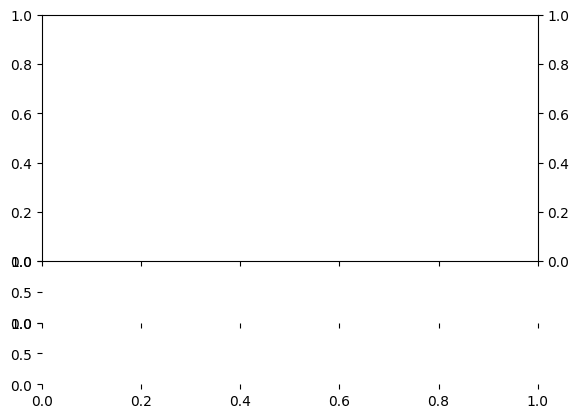

In [4]:
plt1, fig1, ax1 = fwdir.plot(include_layout=True, include_particles=True, ykeys=['sigma_x', 'sigma_y'], ykeys2=['sigma_z'])

In [4]:
fwdir.beams

NameError: name 'fwdir' is not defined

In [8]:
bdir = rbf.load_directory('./getting_started')

In [5]:
hasattr(np, "mean")

True

In [3]:
from SimulationFramework.Modules.Beams import beamGroup, beam
import glob, os
bg = beamGroup()
types={"SimFrame": ".hdf5"}
for code, string in types.items():
    beam_files = glob.glob('./getting_started' + "/*" + string)
    print(code, [os.path.basename(t) for t in beam_files])
    bg.add(beam_files)
    bg.sort()

SimFrame ['CLA-VBC-SIM-MARK-01.hdf5', 'CLA-S04-DIA-BPM-06.hdf5', 'CLA-S07-DIA-BPM-02.hdf5', 'CLA-S04-SIM-MARK-02.hdf5', 'CLA-SP3-DIA-BPM-01.hdf5', 'laser.hdf5', 'CLA-S04-DIA-SCR-05.hdf5', 'CLA-S03-DIA-SCR-01.hdf5', 'CLA-SP3-DIA-FCUP-01.hdf5', 'CLA-S02-DIA-SCR-02.hdf5', 'CLA-S07-DIA-BPM-04.hdf5', 'CLA-S07-DIA-BPM-01.hdf5', 'CLA-S06-DIA-SCR-02.hdf5', 'CLA-S07-DIA-BPM-05.hdf5', 'CLA-SP3-DIA-SCR-02.hdf5', 'CLA-S04-DIA-BPM-04.hdf5', 'CLA-S07-DCP-SCR-01.hdf5', 'CLA-S04-DIA-BPM-02.hdf5', 'CLA-S05-DIA-SCR-01.hdf5', 'CLA-S05-DIA-BPM-02.hdf5', 'CLA-S02-DIA-BPM-02.hdf5', 'Twiss_Summary.hdf5', 'CLA-S01-DIA-BPM-01.hdf5', 'CLA-S02-DIA-SCR-01.hdf5', 'CLA-S03-DIA-BPM-01.hdf5', 'CLA-VBC-DIA-SCR-01.hdf5', 'CLA-S01-DIA-SCR-01.hdf5', 'CLA-VBC-DIA-BPM-01.hdf5', 'CLA-S04-DIA-BPM-03.hdf5', 'CLA-S06-SIM-MARK-02.hdf5', 'CLA-S04-DIA-SCR-03.hdf5', 'CLA-S04-DIA-SCR-04.hdf5', 'CLA-S07-DIA-BPM-03.hdf5', 'CLA-S07-SIM-MARK-01.hdf5', 'CLA-S07-SIM-START-01.hdf5', 'CLA-S04-DIA-SCR-02.hdf5', 'CLA-S07-DIA-SCR-02.hdf5', 'C

TypeError: 'beam' object is not subscriptable

In [6]:
print(bg.beams[list(bg.beams.keys())[0]].z)

None


In [5]:
P = fwdir.beams
X = fwdir.twiss.stat("z")
xkey = "z"
limits = X.val.min(), X.val.max()
Pnames = []
X_particles = []

for pname in range(len(P)):  # Modified from Impact
    xp = np.mean(np.array(P[pname][xkey]))
    if xp >= limits[0] and xp <= limits[1]:
        Pnames.append(pname)
        X_particles.append(xp)
X_particles = np.array(X_particles)

TypeError: 'beam' object is not subscriptable

In [5]:
P[0].sigma_x

RecursionError: maximum recursion depth exceeded

In [6]:
ykeys=["sigma_x", "sigma_y"]
ykeys2=["sigma_z"]
for ix, keys in enumerate([ykeys, ykeys2]):
    for key in keys:
        print(key)
        if Pnames:
            # try:
            # print(Pnames, [key in P._parameters['data'] for key in Pnames])
            Y_particles = np.array(
                [
                    (
                        np.std(getattr(P[name],key))
                        if key in P._parameters["data"]
                        else getattr(P[name], key)
                    )
                    for name in Pnames
                ]
            )

sigma_x
sigma_y
sigma_z


In [20]:
filename = beam_files[0]
if isinstance(filename, str):
    filename = [filename]
for file in filename:
    if os.path.isdir(file):
        self.add_directory(file)
    elif os.path.isfile(file):
        file = file.replace("\\", "/")
        print(file)
        bg.beams[file] = beam(file)

./getting_started/CLA-VBC-SIM-MARK-01.hdf5


RecursionError: maximum recursion depth exceeded